In [4]:
import pandas as pd
import seaborn as sns

In [2]:
df =pd.read_csv(r"C:\Users\pbann\OneDrive\Desktop\science\data set\titanic_dataset.csv")

Which Machine LEarning Models Are Sensitive To Outliers?

Naivye Bayes Classifier--- Not Sensitive To Outliers

SVM-------- Not Sensitive To Outliers

Linear Regression---------- Sensitive To Outliers

Logistic Regression------- Sensitive To Outliers

Decision Tree Regressor or Classifier---- Not Sensitive

Ensemble(RF,XGboost,GB)------- Not Sensitive

KNN--------------------------- Not Sensitive

Kmeans------------------------ Sensitive

Hierarichal------------------- Sensitive

PCA-------------------------- Sensitive

Neural Networks-------------- Sensitive

In [3]:
df['Age'].isnull().sum()

177

C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

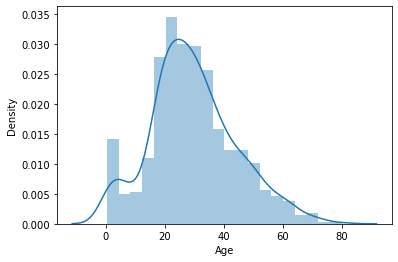

In [5]:
sns.distplot(df['Age'])

C:\Users\pbann\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

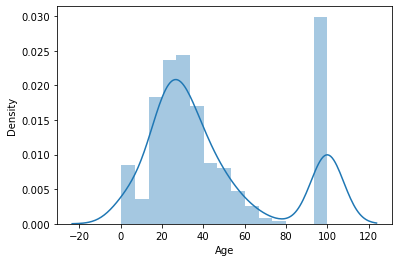

In [6]:
sns.distplot(df['Age'].fillna(100))  # added outlier inplace of nan

Text(0, 0.5, 'No of passengers')

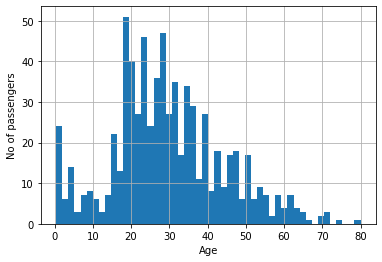

In [13]:
fig=df.Age.hist(bins=50)
fig.set_xlabel('Age')
fig.set_ylabel('No of passengers')

<AxesSubplot:>

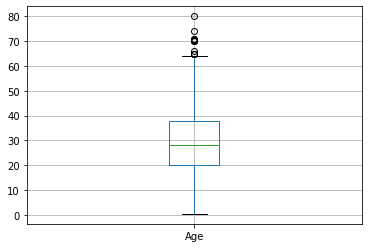

In [15]:
df.boxplot('Age')

In [17]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# when data is in gaussian distribution follow this approach

In [43]:
upperboundary = df['Age'].mean()+3* df['Age'].std()
lowerboundary=df['Age'].mean()-3* df['Age'].std()
print(upperboundary,':',lowerboundary,':',df['Age'].mean())

73.27860964406095 : -13.88037434994331 : 29.69911764705882


# when data is in skewed

In [30]:
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

In [31]:
IQR

17.875

In [32]:
lower_bridge = df['Age'].quantile(0.25)-(IQR*1.5)

In [33]:
upper_bridge = df['Age'].quantile(0.75)+(IQR*1.5)

In [34]:
print(lower_bridge,';',upper_bridge)

-6.6875 ; 64.8125


In [36]:
#extreme outliers
upper_bridge = df['Age'].quantile(0.75)+(IQR*3)
lower_bridge = df['Age'].quantile(0.25)-(IQR*3)
print(lower_bridge,';',upper_bridge)

-33.5 ; 91.625


# FEATURE IS SKEWED

Text(0, 0.5, 'No of passengers')

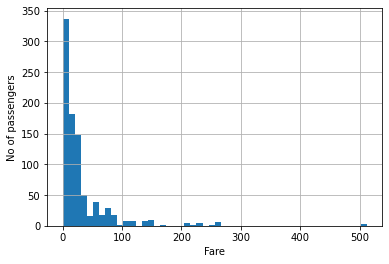

In [37]:
fig=df.Fare.hist(bins=50)
fig.set_xlabel('Fare')
fig.set_ylabel('No of passengers')

<AxesSubplot:>

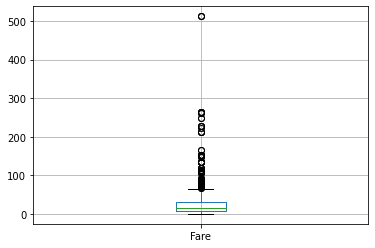

In [38]:
df.boxplot('Fare')

In [40]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [42]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

# we have go wth extreme outliers for the skewed data

In [44]:
upper_bridge = df['Fare'].quantile(0.75)+(IQR*3)
lower_bridge = df['Fare'].quantile(0.25)-(IQR*3)
print(lower_bridge,';',upper_bridge)

-61.358399999999996 ; 100.2688


In [47]:
data = df.copy()

In [49]:
data.loc[data['Age']>73,'Age']=73
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [51]:
data.loc[data['Fare']>73,'Fare']=100
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0, 0.5, 'No of passengers')

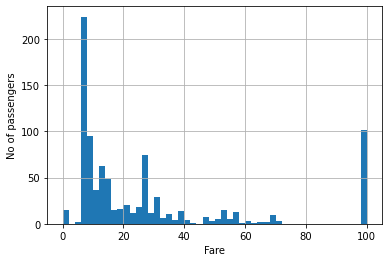

In [52]:
fig=data.Fare.hist(bins=50)
fig.set_xlabel('Fare')
fig.set_ylabel('No of passengers')

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.3)

In [57]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6791044776119403
roc_auc_score: 0.7234474926782619


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [59]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.664179104477612
roc_auc_score: 0.6724218521764533


In [62]:
### RandomForest Classifier 
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6604477611940298
roc_auc_score: 0.6913818288051418


# HANDLING imbalance data set


Credit Card Kaggle- Fixing Imbalanced Dataset
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project


In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [66]:
!pip install imblearn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [2]:
df = pd.read_csv(r'C:\Users\pbann\OneDrive\Desktop\science\data set\creditcard.csv')

In [3]:
df['Class'].value_counts()   # data is imbalanced  here

0    284315
1       492
Name: Class, dtype: int64

In [18]:
X = df.drop('Class',axis=1)
y = df.Class

In [5]:
#under sampling

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV


In [14]:
10.0 **np.arange(-2,3)


array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [16]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Value

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [20]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85249    45]
 [   58    91]]
0.9987945179827488
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.67      0.61      0.64       149

    accuracy                           1.00     85443
   macro avg       0.83      0.81      0.82     85443
weighted avg       1.00      1.00      1.00     85443



# using random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85284    10]
 [   34   115]]
0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.92      0.77      0.84       149

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
# giving class weight = importance to class 1 is given here

In [25]:
class_weight = dict({0:1,1:100})

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight = dict({0:1,1:100}))
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [27]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85288     6]
 [   37   112]]
0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.95      0.75      0.84       149

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# under sampling  : use this if data size is very less


In [28]:
y_train.value_counts()

0    199021
1       343
Name: Class, dtype: int64

In [30]:
from collections import Counter
Counter(y_train)

Counter({0: 199021, 1: 343})

In [33]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\pbann\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199021, 1: 343})
The number of classes after fit Counter({0: 428, 1: 343})


In [34]:
0.8*433

346.40000000000003

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)



RandomForestClassifier()

In [38]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[62954 22340]
 [   17   132]]
0.7383401800030429
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     85294
           1       0.01      0.89      0.01       149

    accuracy                           0.74     85443
   macro avg       0.50      0.81      0.43     85443
weighted avg       1.00      0.74      0.85     85443



# over Sampling

In [40]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\pbann\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199021, 1: 343})
The number of classes after fit Counter({0: 199021, 1: 149265})


In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [42]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85288     6]
 [   37   112]]
0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.95      0.75      0.84       149

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# false negative is reduced this is the best approach as undersampling gives worst results, precission score is also good.

# SMOTE Tomek : uses both undersampling and over sampling it creates points nearest to the points it has to increase size

In [46]:
from imblearn.combine import SMOTETomek

In [47]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\pbann\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 199021, 1: 343})
The number of classes after fit Counter({0: 198337, 1: 148581})


In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [49]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85284    10]
 [   34   115]]
0.9994850368081645
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.92      0.77      0.84       149

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# Ensemble Techniques

In [51]:
from imblearn.ensemble import EasyEnsembleClassifier
easy=EasyEnsembleClassifier()
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [52]:
y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[82834  2460]
 [   17   132]]
0.9710099130414428
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85294
           1       0.05      0.89      0.10       149

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



# Isolation Forest